<a href="https://colab.research.google.com/github/Siddhi-Sovle/Data-Science/blob/main/Neural_Network.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv("/content/forestfires.csv")

In [ ]:
df.head()

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,...,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
0,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,...,0,0,0,0,1,0,0,0,0,small
1,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,...,0,0,0,0,0,0,0,1,0,small
2,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,...,0,0,0,0,0,0,0,1,0,small
3,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,...,0,0,0,0,1,0,0,0,0,small
4,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,...,0,0,0,0,1,0,0,0,0,small


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 517 entries, 0 to 516
Data columns (total 31 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   month          517 non-null    object 
 1   day            517 non-null    object 
 2   FFMC           517 non-null    float64
 3   DMC            517 non-null    float64
 4   DC             517 non-null    float64
 5   ISI            517 non-null    float64
 6   temp           517 non-null    float64
 7   RH             517 non-null    int64  
 8   wind           517 non-null    float64
 9   rain           517 non-null    float64
 10  area           517 non-null    float64
 11  dayfri         517 non-null    int64  
 12  daymon         517 non-null    int64  
 13  daysat         517 non-null    int64  
 14  daysun         517 non-null    int64  
 15  daythu         517 non-null    int64  
 16  daytue         517 non-null    int64  
 17  daywed         517 non-null    int64  
 18  monthapr  

In [ ]:
df['dayfri'].value_counts()

0    432
1     85
Name: dayfri, dtype: int64

In [ ]:
df['Day_of_week'] = df[['dayfri','daymon', 'daysat', 'daysun', 'daythu', 'daytue', 'daywed']].idxmax(axis=1) #idxmax(axis=1) is used to find the column with the maximum value (1) for each row.


In [ ]:
df = df.drop(['dayfri','daymon', 'daysat', 'daysun', 'daythu', 'daytue', 'daywed'], axis=1)
df = df.drop(['monthapr','monthaug','monthdec','monthfeb','monthjan','monthjul','monthjun','monthmar','monthmay','monthnov','monthoct','monthsep'], axis=1)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 517 entries, 0 to 516
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   month          517 non-null    object 
 1   day            517 non-null    object 
 2   FFMC           517 non-null    float64
 3   DMC            517 non-null    float64
 4   DC             517 non-null    float64
 5   ISI            517 non-null    float64
 6   temp           517 non-null    float64
 7   RH             517 non-null    int64  
 8   wind           517 non-null    float64
 9   rain           517 non-null    float64
 10  area           517 non-null    float64
 11  size_category  517 non-null    object 
 12  Day_of_week    517 non-null    object 
dtypes: float64(8), int64(1), object(4)
memory usage: 52.6+ KB


In [ ]:
df.describe()

,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
count,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000
mean,90.644681,110.872340,547.940039,9.021663,18.889168,44.288201,4.017602,0.021663,12.847292
std,5.520111,64.046482,248.066192,4.559477,5.806625,16.317469,1.791653,0.295959,63.655818
min,18.700000,1.100000,7.900000,0.000000,2.200000,15.000000,0.400000,0.000000,0.000000
25%,90.200000,68.600000,437.700000,6.500000,15.500000,33.000000,2.700000,0.000000,0.000000
50%,91.600000,108.300000,664.200000,8.400000,19.300000,42.000000,4.000000,0.000000,0.520000
75%,92.900000,142.400000,713.900000,10.800000,22.800000,53.000000,4.900000,0.000000,6.570000
max,96.200000,291.300000,860.600000,56.100000,33.300000,100.000000,9.400000,6.400000,1090.840000


In [ ]:
df['month'].value_counts()

aug    184
sep    172
mar     54
jul     32
feb     20
jun     17
oct     15
apr      9
dec      9
jan      2
may      2
nov      1
Name: month, dtype: int64

In [ ]:
df.sort_values(by='area', ascending=False).head()

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,size_category,Day_of_week
238,sep,sat,92.5,121.1,674.4,8.6,25.1,27,4.0,0.0,1090.84,large,daysat
415,aug,thu,94.8,222.4,698.6,13.9,27.5,27,4.9,0.0,746.28,large,daythu
479,jul,mon,89.2,103.9,431.6,6.4,22.6,57,4.9,0.0,278.53,large,daymon
237,sep,tue,91.0,129.5,692.6,7.0,18.8,40,2.2,0.0,212.88,large,daytue
236,sep,sat,92.5,121.1,674.4,8.6,18.2,46,1.8,0.0,200.94,large,daysat


In [ ]:
freq_encoding = df['month'].value_counts(normalize=True)
df['month_encoded'] = df['month'].map(freq_encoding)
freq_encoding = df['day'].value_counts(normalize=True)
df['day_encoded'] = df['day'].map(freq_encoding)

In [ ]:
df.head()

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,size_category,Day_of_week,month_encoded,day_encoded
0,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.0,small,dayfri,0.104449,0.164410
1,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.0,small,daytue,0.029014,0.123791
2,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.0,small,daysat,0.029014,0.162476
3,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.0,small,dayfri,0.104449,0.164410
4,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.0,small,daysun,0.104449,0.183752


In [ ]:
df = df.drop(['month','day'],axis=1)

In [ ]:
df.head()

,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,size_category,Day_of_week,month_encoded,day_encoded
0,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.0,small,dayfri,0.104449,0.164410
1,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.0,small,daytue,0.029014,0.123791
2,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.0,small,daysat,0.029014,0.162476
3,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.0,small,dayfri,0.104449,0.164410
4,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.0,small,daysun,0.104449,0.183752


In [ ]:
df = df.drop('Day_of_week', axis=1)

In [ ]:
df = pd.get_dummies(df, columns=['size_category'], drop_first=True)

In [ ]:
df.head()

,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,month_encoded,day_encoded,size_category_small
0,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.0,0.104449,0.164410,1
1,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.0,0.029014,0.123791,1
2,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.0,0.029014,0.162476,1
3,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.0,0.104449,0.164410,1
4,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.0,0.104449,0.183752,1


FFMC :
{'whiskers': [<matplotlib.lines.Line2D object at 0x7fb91332baf0>, <matplotlib.lines.Line2D object at 0x7fb91332bd90>], 'caps': [<matplotlib.lines.Line2D object at 0x7fb9133a4070>, <matplotlib.lines.Line2D object at 0x7fb9133a4310>], 'boxes': [<matplotlib.lines.Line2D object at 0x7fb91332a5f0>], 'medians': [<matplotlib.lines.Line2D object at 0x7fb9133a45b0>], 'fliers': [<matplotlib.lines.Line2D object at 0x7fb9133a4850>], 'means': []}


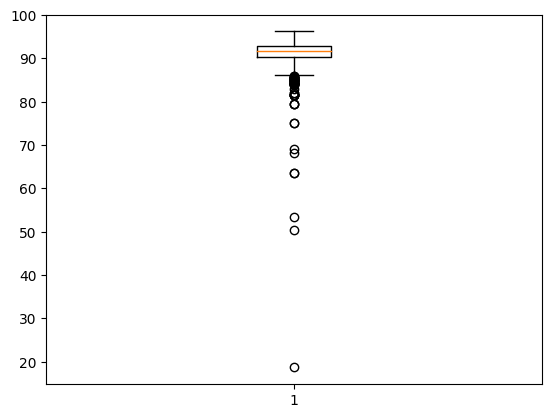

DMC :
{'whiskers': [<matplotlib.lines.Line2D object at 0x7fb911290e50>, <matplotlib.lines.Line2D object at 0x7fb911290fa0>], 'caps': [<matplotlib.lines.Line2D object at 0x7fb911291270>, <matplotlib.lines.Line2D object at 0x7fb911291510>], 'boxes': [<matplotlib.lines.Line2D object at 0x7fb911290bb0>], 'medians': [<matplotlib.lines.Line2D object at 0x7fb9112917b0>], 'fliers': [<matplotlib.lines.Line2D object at 0x7fb911291a50>], 'means': []}


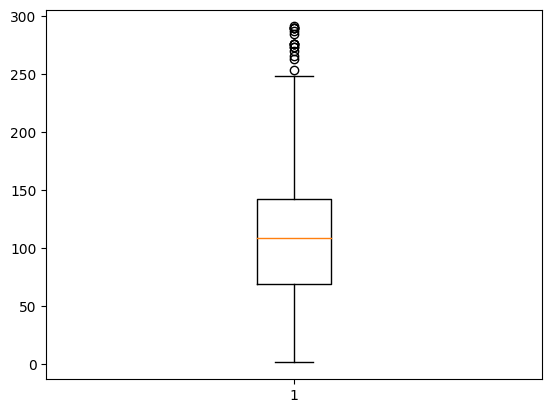

DC :
{'whiskers': [<matplotlib.lines.Line2D object at 0x7fb911318460>, <matplotlib.lines.Line2D object at 0x7fb911318700>], 'caps': [<matplotlib.lines.Line2D object at 0x7fb911318880>, <matplotlib.lines.Line2D object at 0x7fb911318b20>], 'boxes': [<matplotlib.lines.Line2D object at 0x7fb9113181c0>], 'medians': [<matplotlib.lines.Line2D object at 0x7fb911318dc0>], 'fliers': [<matplotlib.lines.Line2D object at 0x7fb911319060>], 'means': []}


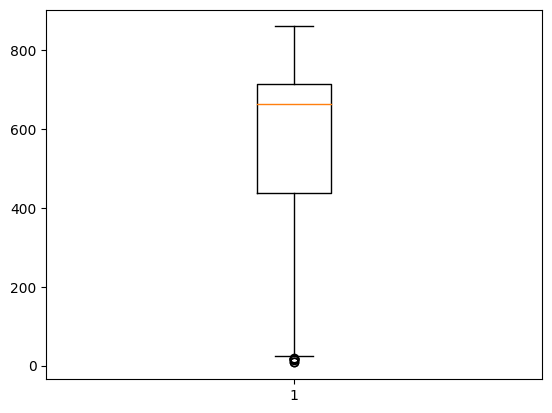

ISI :
{'whiskers': [<matplotlib.lines.Line2D object at 0x7fb91115a620>, <matplotlib.lines.Line2D object at 0x7fb91115a8c0>], 'caps': [<matplotlib.lines.Line2D object at 0x7fb91115ab60>, <matplotlib.lines.Line2D object at 0x7fb91115ae00>], 'boxes': [<matplotlib.lines.Line2D object at 0x7fb91115a380>], 'medians': [<matplotlib.lines.Line2D object at 0x7fb91115b0a0>], 'fliers': [<matplotlib.lines.Line2D object at 0x7fb91115b340>], 'means': []}


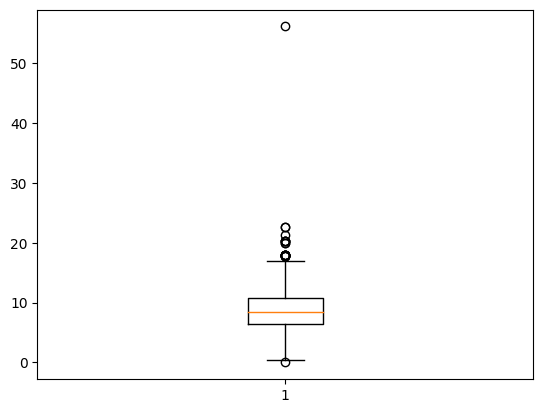

temp :
{'whiskers': [<matplotlib.lines.Line2D object at 0x7fb91131b0d0>, <matplotlib.lines.Line2D object at 0x7fb911318e50>], 'caps': [<matplotlib.lines.Line2D object at 0x7fb9113181c0>, <matplotlib.lines.Line2D object at 0x7fb911318430>], 'boxes': [<matplotlib.lines.Line2D object at 0x7fb9112e0c10>], 'medians': [<matplotlib.lines.Line2D object at 0x7fb9113186a0>], 'fliers': [<matplotlib.lines.Line2D object at 0x7fb911318c40>], 'means': []}


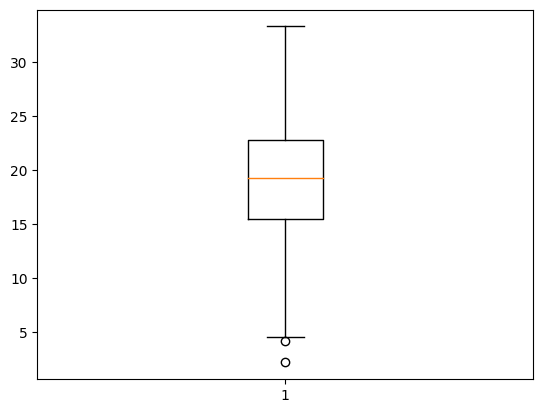

RH :
{'whiskers': [<matplotlib.lines.Line2D object at 0x7fb9111d6f80>, <matplotlib.lines.Line2D object at 0x7fb9111d7220>], 'caps': [<matplotlib.lines.Line2D object at 0x7fb9111d74c0>, <matplotlib.lines.Line2D object at 0x7fb9111d7760>], 'boxes': [<matplotlib.lines.Line2D object at 0x7fb9111d6ce0>], 'medians': [<matplotlib.lines.Line2D object at 0x7fb9111d7a00>], 'fliers': [<matplotlib.lines.Line2D object at 0x7fb9111d7ca0>], 'means': []}


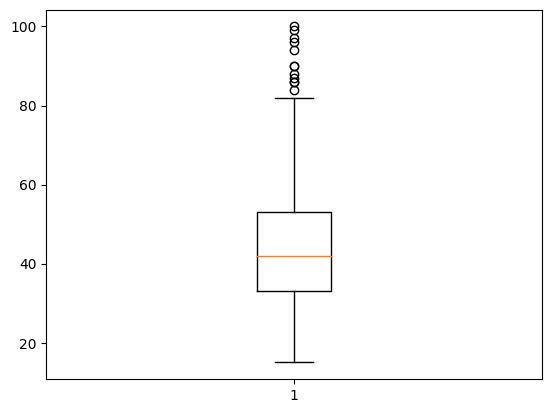

wind :
{'whiskers': [<matplotlib.lines.Line2D object at 0x7fb9111d53f0>, <matplotlib.lines.Line2D object at 0x7fb9111d4b50>], 'caps': [<matplotlib.lines.Line2D object at 0x7fb91120dd80>, <matplotlib.lines.Line2D object at 0x7fb91120dc00>], 'boxes': [<matplotlib.lines.Line2D object at 0x7fb9111d5090>], 'medians': [<matplotlib.lines.Line2D object at 0x7fb91120fe50>], 'fliers': [<matplotlib.lines.Line2D object at 0x7fb91120c7c0>], 'means': []}


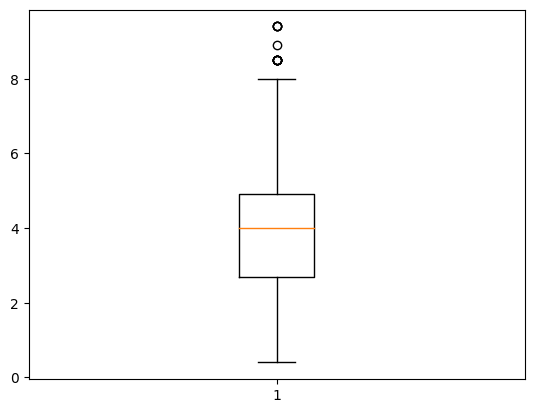

rain :
{'whiskers': [<matplotlib.lines.Line2D object at 0x7fb9112e1000>, <matplotlib.lines.Line2D object at 0x7fb9112e14e0>], 'caps': [<matplotlib.lines.Line2D object at 0x7fb91113cf70>, <matplotlib.lines.Line2D object at 0x7fb91113c7f0>], 'boxes': [<matplotlib.lines.Line2D object at 0x7fb9112e1060>], 'medians': [<matplotlib.lines.Line2D object at 0x7fb91113d180>], 'fliers': [<matplotlib.lines.Line2D object at 0x7fb91113cfd0>], 'means': []}


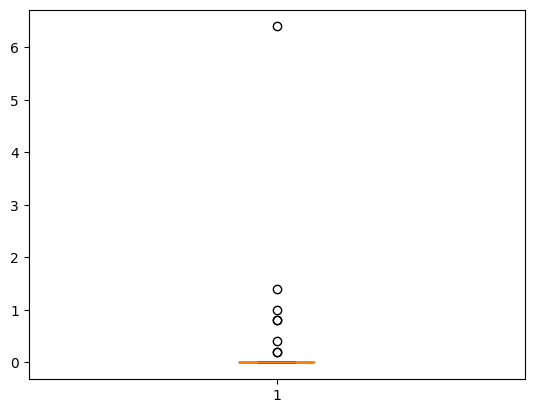

area :
{'whiskers': [<matplotlib.lines.Line2D object at 0x7fb91115b820>, <matplotlib.lines.Line2D object at 0x7fb91115a1d0>], 'caps': [<matplotlib.lines.Line2D object at 0x7fb91119d630>, <matplotlib.lines.Line2D object at 0x7fb9111d4fd0>], 'boxes': [<matplotlib.lines.Line2D object at 0x7fb91113d0c0>], 'medians': [<matplotlib.lines.Line2D object at 0x7fb91102a860>], 'fliers': [<matplotlib.lines.Line2D object at 0x7fb91102b130>], 'means': []}


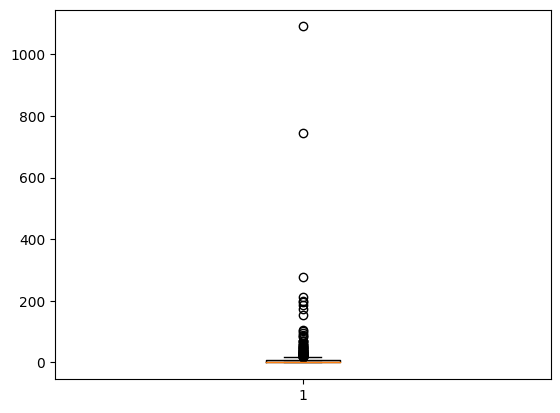

month_encoded :
{'whiskers': [<matplotlib.lines.Line2D object at 0x7fb911065f30>, <matplotlib.lines.Line2D object at 0x7fb9110661d0>], 'caps': [<matplotlib.lines.Line2D object at 0x7fb911066470>, <matplotlib.lines.Line2D object at 0x7fb911066710>], 'boxes': [<matplotlib.lines.Line2D object at 0x7fb911065c90>], 'medians': [<matplotlib.lines.Line2D object at 0x7fb9110669b0>], 'fliers': [<matplotlib.lines.Line2D object at 0x7fb911066c50>], 'means': []}


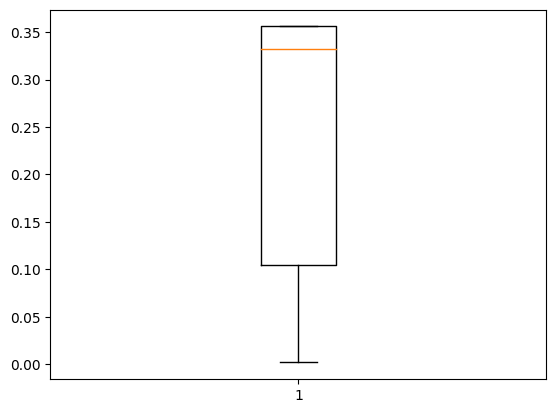

day_encoded :
{'whiskers': [<matplotlib.lines.Line2D object at 0x7fb9110ca230>, <matplotlib.lines.Line2D object at 0x7fb91108cd30>], 'caps': [<matplotlib.lines.Line2D object at 0x7fb91108fdf0>, <matplotlib.lines.Line2D object at 0x7fb91108ca60>], 'boxes': [<matplotlib.lines.Line2D object at 0x7fb9110c9f90>], 'medians': [<matplotlib.lines.Line2D object at 0x7fb91108c6a0>], 'fliers': [<matplotlib.lines.Line2D object at 0x7fb91108cc10>], 'means': []}


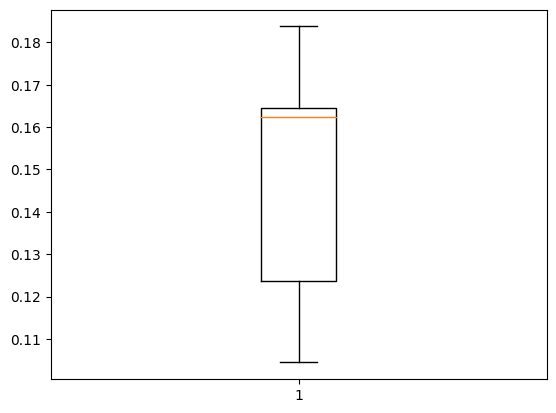

size_category_small :
{'whiskers': [<matplotlib.lines.Line2D object at 0x7fb9110cbdf0>, <matplotlib.lines.Line2D object at 0x7fb9110f40d0>], 'caps': [<matplotlib.lines.Line2D object at 0x7fb9110f4370>, <matplotlib.lines.Line2D object at 0x7fb9110f4610>], 'boxes': [<matplotlib.lines.Line2D object at 0x7fb9110cbb50>], 'medians': [<matplotlib.lines.Line2D object at 0x7fb9110f48b0>], 'fliers': [<matplotlib.lines.Line2D object at 0x7fb9110f4c40>], 'means': []}


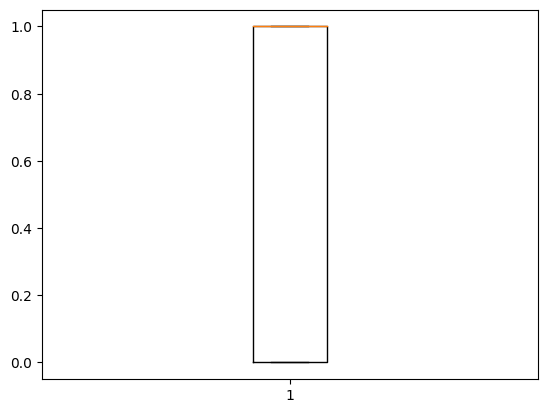

In [ ]:
for i in df.columns:
  print(i,":")
  print(plt.boxplot(df[i]))
  plt.show()

In [ ]:
Q3 = df['FFMC'].quantile(q=0.75)
Q1 = df['FFMC'].quantile(q=0.25)
IQR = Q3 - Q1
up = Q3 + 1.5 * IQR
down = Q1 - 1.5 * IQR

In [ ]:
import numpy as np

def cap_extreme_values(data, lower_bound, upper_bound):
    capped_data = np.clip(data, lower_bound, upper_bound)
    return capped_data

a = cap_extreme_values(df['FFMC'], down, up)
df['FFMC'] = a

In [ ]:
Q3 = df['DMC'].quantile(q=0.75)
Q1 = df['DMC'].quantile(q=0.25)
IQR = Q3 - Q1
up = Q3 + 1.5 * IQR
down = Q1 - 1.5 * IQR

In [ ]:
import numpy as np

def cap_extreme_values(data, lower_bound, upper_bound):
    capped_data = np.clip(data, lower_bound, upper_bound)
    return capped_data

b = cap_extreme_values(df['DMC'], down, up)
df['DMC'] = b

In [ ]:
Q3 = df['DC'].quantile(q=0.75)
Q1 = df['DC'].quantile(q=0.25)
IQR = Q3 - Q1
up = Q3 + 1.5 * IQR
down = Q1 - 1.5 * IQR

In [ ]:
import numpy as np

def cap_extreme_values(data, lower_bound, upper_bound):
    capped_data = np.clip(data, lower_bound, upper_bound)
    return capped_data

c = cap_extreme_values(df['DC'], down, up)
df['DC'] = c

In [ ]:
Q3 = df['ISI'].quantile(q=0.75)
Q1 = df['ISI'].quantile(q=0.25)
IQR = Q3 - Q1
up = Q3 + 1.5 * IQR
down = Q1 - 1.5 * IQR

In [ ]:
import numpy as np

def cap_extreme_values(data, lower_bound, upper_bound):
    capped_data = np.clip(data, lower_bound, upper_bound)
    return capped_data

d = cap_extreme_values(df['ISI'], down, up)
df['ISI'] = d

In [ ]:
Q3 = df['temp'].quantile(q=0.75)
Q1 = df['temp'].quantile(q=0.25)
IQR = Q3 - Q1
up = Q3 + 1.5 * IQR
down = Q1 - 1.5 * IQR

In [ ]:
import numpy as np

def cap_extreme_values(data, lower_bound, upper_bound):
    capped_data = np.clip(data, lower_bound, upper_bound)
    return capped_data

e = cap_extreme_values(df['temp'], down, up)
df['temp'] = e

In [ ]:
Q3 = df['RH'].quantile(q=0.75)
Q1 = df['RH'].quantile(q=0.25)
IQR = Q3 - Q1
up = Q3 + 1.5 * IQR
down = Q1 - 1.5 * IQR

In [ ]:
import numpy as np

def cap_extreme_values(data, lower_bound, upper_bound):
    capped_data = np.clip(data, lower_bound, upper_bound)
    return capped_data

f = cap_extreme_values(df['RH'], down, up)
df['RH'] = f

In [ ]:
Q3 = df['wind'].quantile(q=0.75)
Q1 = df['wind'].quantile(q=0.25)
IQR = Q3 - Q1
up = Q3 + 1.5 * IQR
down = Q1 - 1.5 * IQR

In [ ]:
import numpy as np

def cap_extreme_values(data, lower_bound, upper_bound):
    capped_data = np.clip(data, lower_bound, upper_bound)
    return capped_data

g = cap_extreme_values(df['wind'], down, up)
df['wind'] = g

In [ ]:
# Q3 = df['rain'].quantile(q=0.75)
# Q1 = df['rain'].quantile(q=0.25)
# IQR = Q3 - Q1
# up = Q3 + 1.5 * IQR
# down = Q1 - 1.5 * IQR

In [ ]:
# import numpy as np

# def cap_extreme_values(data, lower_bound, upper_bound):
#     capped_data = np.clip(data, lower_bound, upper_bound)
#     return capped_data

# h = cap_extreme_values(df['rain'], down, up)
# df['rain'] = h

In [ ]:
Q3 = df['area'].quantile(q=0.75)
Q1 = df['area'].quantile(q=0.25)
IQR = Q3 - Q1
up = Q3 + 1.5 * IQR
down = Q1 - 1.5 * IQR

In [ ]:
import numpy as np

def cap_extreme_values(data, lower_bound, upper_bound):
    capped_data = np.clip(data, lower_bound, upper_bound)
    return capped_data

i = cap_extreme_values(df['area'], down, up)
df['area'] = i

In [ ]:
df.head()

,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,month_encoded,day_encoded,size_category_small
0,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.0,0.104449,0.164410,1
1,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.0,0.029014,0.123791,1
2,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.0,0.029014,0.162476,1
3,91.7,33.3,77.5,9.0,8.3,83,4.0,0.2,0.0,0.104449,0.164410,1
4,89.3,51.3,102.2,9.6,11.4,83,1.8,0.0,0.0,0.104449,0.183752,1


In [ ]:
df['rain'].max()

6.4

In [ ]:
df.corr()

,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,month_encoded,day_encoded,size_category_small
FFMC,1.000000,0.534013,0.467209,0.795081,0.631504,-0.283575,-0.084672,0.104919,-0.000823,0.498270,-0.122731,-0.001282
DMC,0.534013,1.000000,0.689109,0.374797,0.490311,0.072017,-0.108018,0.078256,0.042561,0.648700,-0.031018,-0.030713
DC,0.467209,0.689109,1.000000,0.289050,0.496286,-0.027162,-0.197459,0.035863,0.047103,0.780809,-0.045517,-0.019385
ISI,0.795081,0.374797,0.289050,1.000000,0.444847,-0.155914,0.112156,0.082328,-0.006113,0.368885,-0.094842,-0.000965
temp,0.631504,0.490311,0.496286,0.444847,1.000000,-0.524971,-0.223913,0.069591,0.013846,0.459573,-0.068154,-0.007259
RH,-0.283575,0.072017,-0.027162,-0.155914,-0.524971,1.000000,0.079884,0.102364,-0.042681,-0.007873,0.172619,0.044273
wind,-0.084672,-0.108018,-0.197459,0.112156,-0.223913,0.079884,1.000000,0.063155,0.077011,-0.127305,0.048490,-0.058280
rain,0.104919,0.078256,0.035863,0.082328,0.069591,0.102364,0.063155,1.000000,0.030317,0.049437,-0.036821,-0.050001
area,-0.000823,0.042561,0.047103,-0.006113,0.013846,-0.042681,0.077011,0.030317,1.000000,0.010441,0.016998,-0.910085
month_encoded,0.498270,0.648700,0.780809,0.368885,0.459573,-0.007873,-0.127305,0.049437,0.010441,1.000000,-0.044310,0.029376


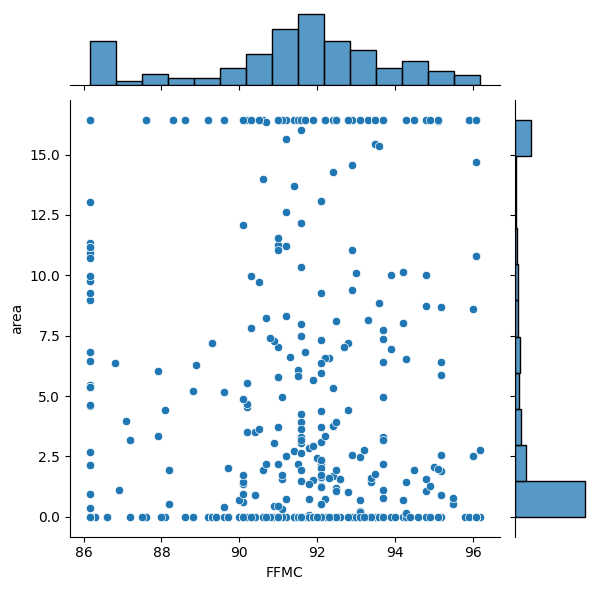

In [ ]:
sns.jointplot(x='FFMC', y='area', data=df, kind='scatter')

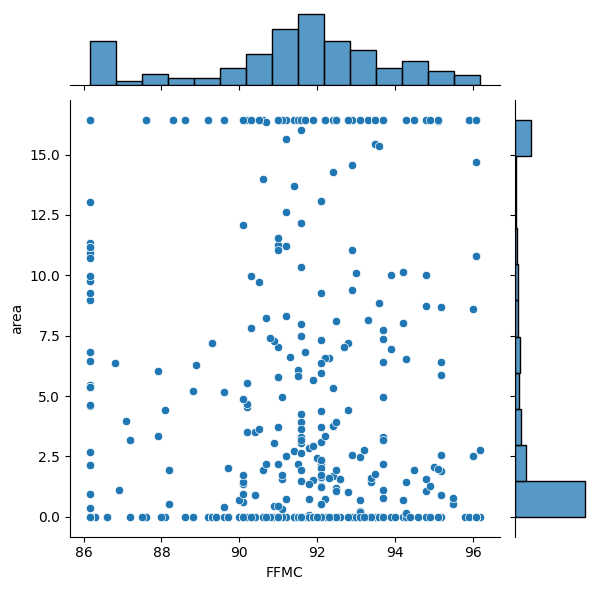

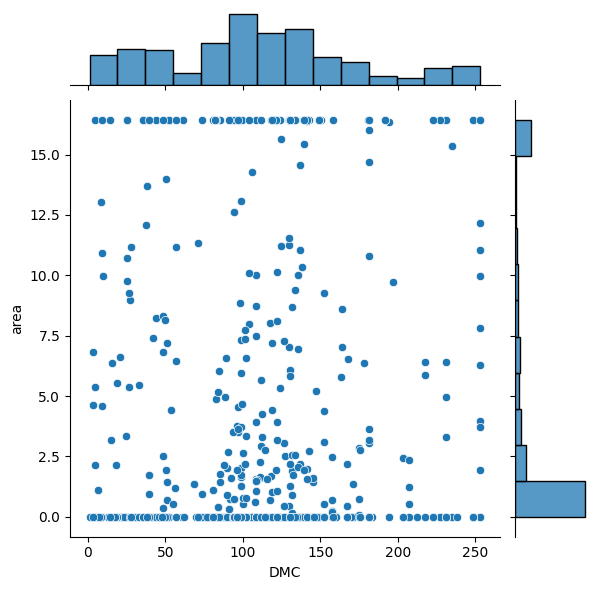

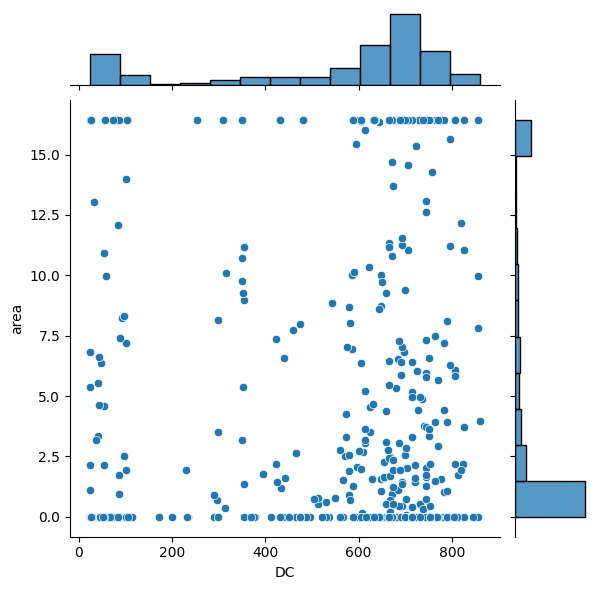

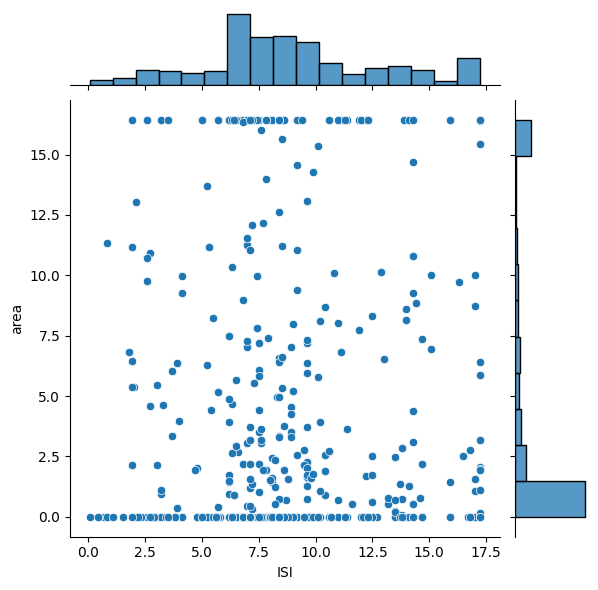

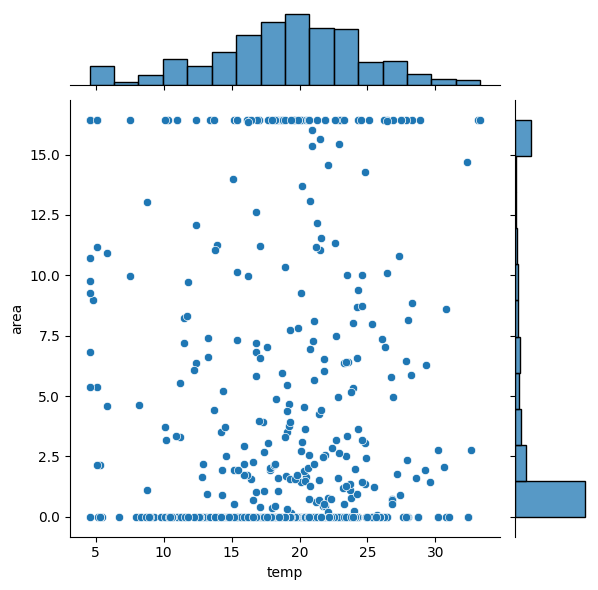

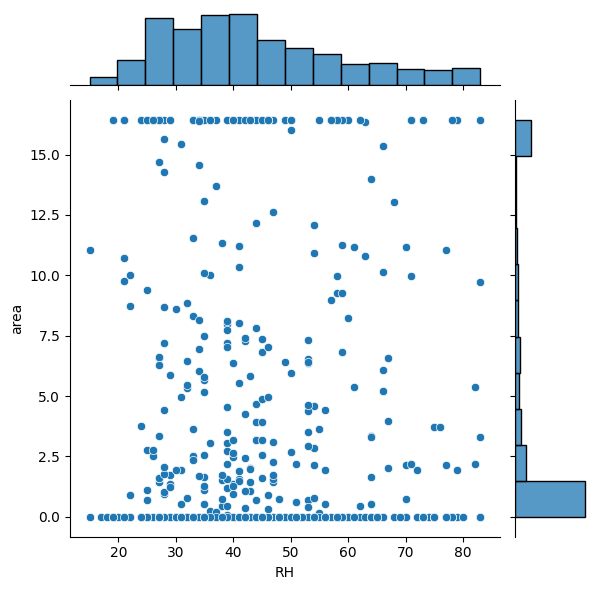

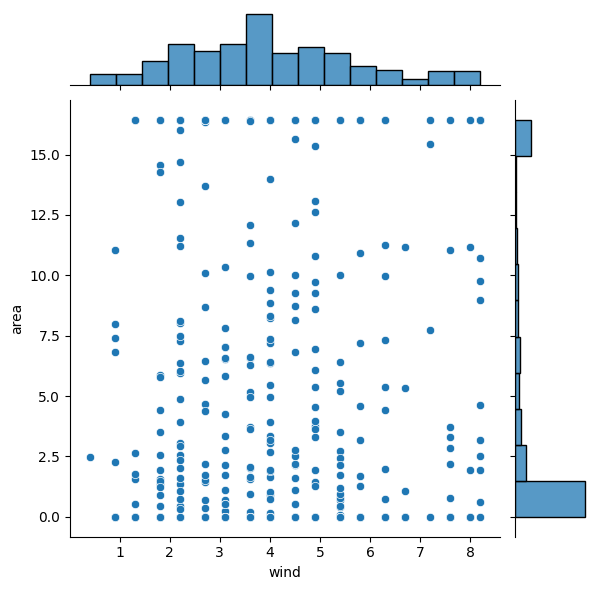

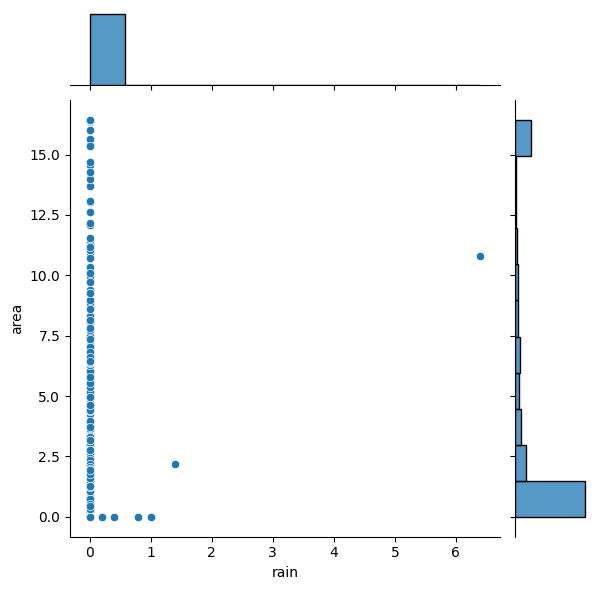

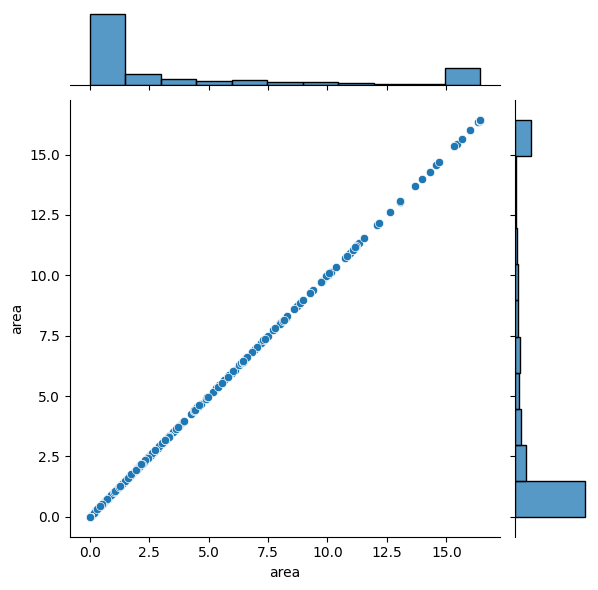

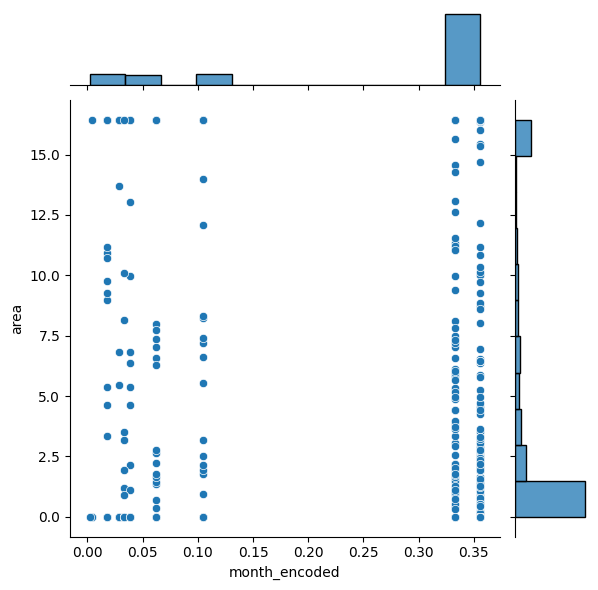

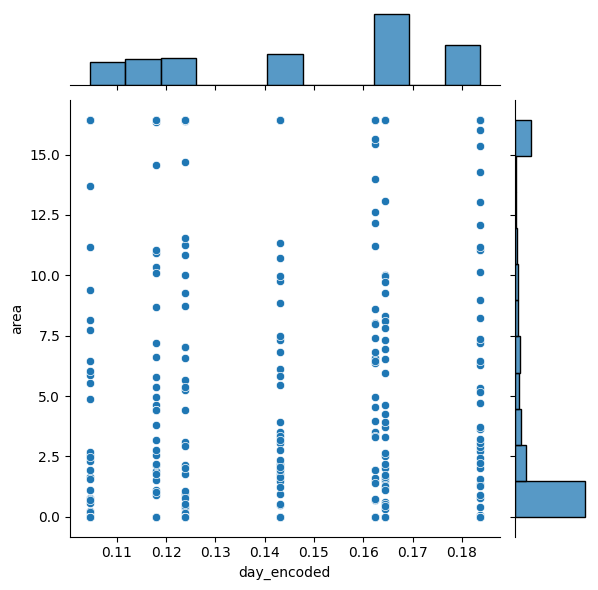

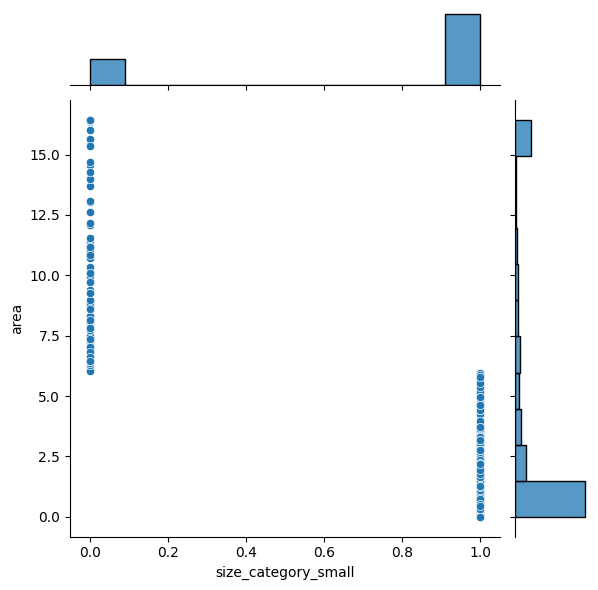

In [ ]:
for i in df.columns:
  sns.jointplot(x=i, y='area', data=df, kind='scatter')
  plt.show()

In [ ]:
df.corr(method='pearson')

,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,month_encoded,day_encoded,size_category_small
FFMC,1.000000,0.534013,0.467209,0.795081,0.631504,-0.283575,-0.084672,0.104919,-0.000823,0.498270,-0.122731,-0.001282
DMC,0.534013,1.000000,0.689109,0.374797,0.490311,0.072017,-0.108018,0.078256,0.042561,0.648700,-0.031018,-0.030713
DC,0.467209,0.689109,1.000000,0.289050,0.496286,-0.027162,-0.197459,0.035863,0.047103,0.780809,-0.045517,-0.019385
ISI,0.795081,0.374797,0.289050,1.000000,0.444847,-0.155914,0.112156,0.082328,-0.006113,0.368885,-0.094842,-0.000965
temp,0.631504,0.490311,0.496286,0.444847,1.000000,-0.524971,-0.223913,0.069591,0.013846,0.459573,-0.068154,-0.007259
RH,-0.283575,0.072017,-0.027162,-0.155914,-0.524971,1.000000,0.079884,0.102364,-0.042681,-0.007873,0.172619,0.044273
wind,-0.084672,-0.108018,-0.197459,0.112156,-0.223913,0.079884,1.000000,0.063155,0.077011,-0.127305,0.048490,-0.058280
rain,0.104919,0.078256,0.035863,0.082328,0.069591,0.102364,0.063155,1.000000,0.030317,0.049437,-0.036821,-0.050001
area,-0.000823,0.042561,0.047103,-0.006113,0.013846,-0.042681,0.077011,0.030317,1.000000,0.010441,0.016998,-0.910085
month_encoded,0.498270,0.648700,0.780809,0.368885,0.459573,-0.007873,-0.127305,0.049437,0.010441,1.000000,-0.044310,0.029376


array([[<Axes: title={'center': 'FFMC'}>,
        <Axes: title={'center': 'DMC'}>, <Axes: title={'center': 'DC'}>],
       [<Axes: title={'center': 'ISI'}>,
        <Axes: title={'center': 'temp'}>, <Axes: title={'center': 'RH'}>],
       [<Axes: title={'center': 'wind'}>,
        <Axes: title={'center': 'rain'}>,
        <Axes: title={'center': 'area'}>],
       [<Axes: title={'center': 'month_encoded'}>,
        <Axes: title={'center': 'day_encoded'}>,
        <Axes: title={'center': 'size_category_small'}>]], dtype=object)

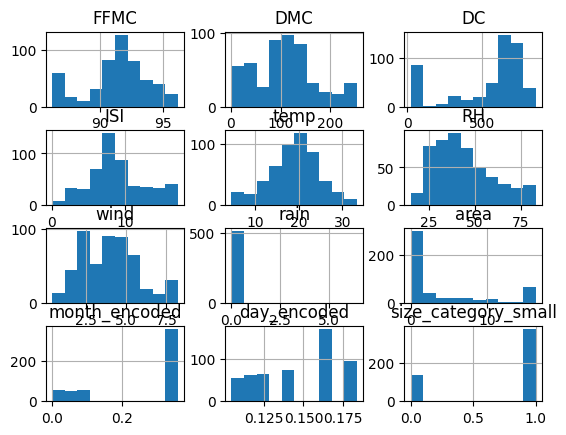

In [ ]:
df.hist()

In [ ]:
#Temp has nearly a gaussian distribution,  There are a mixture of positive skews and negative skews among the other attributes

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.feature_selection import RFE

In [ ]:
X = df.drop('area', axis=1)
Y = df['area']

In [ ]:
from sklearn.feature_selection import RFE
from sklearn.ensemble import ExtraTreesRegressor

# Create an instance of ExtraTreesRegressor
model = ExtraTreesRegressor()

# Create an instance of RFE and specify the model and the number of features to select (3 in this case)
rfe = RFE(estimator=model, n_features_to_select=3)

selected = rfe.fit_transform(X,Y)
print(rfe.support_)
print(rfe.ranking_)


[False False  True False  True False False False False False  True]
[3 6 1 5 1 2 4 9 8 7 1]


In [ ]:
X

,FFMC,DMC,DC,ISI,temp,RH,wind,rain,month_encoded,day_encoded,size_category_small
0,86.20,26.2,94.3,5.1,8.2,51,6.7,0.0,0.104449,0.164410,1
1,90.60,35.4,669.1,6.7,18.0,33,0.9,0.0,0.029014,0.123791,1
2,90.60,43.7,686.9,6.7,14.6,33,1.3,0.0,0.029014,0.162476,1
3,91.70,33.3,77.5,9.0,8.3,83,4.0,0.2,0.104449,0.164410,1
4,89.30,51.3,102.2,9.6,11.4,83,1.8,0.0,0.104449,0.183752,1
...,...,...,...,...,...,...,...,...,...,...,...
512,86.15,56.7,665.6,1.9,27.8,32,2.7,0.0,0.355899,0.183752,0
513,86.15,56.7,665.6,1.9,21.9,71,5.8,0.0,0.355899,0.183752,0
514,86.15,56.7,665.6,1.9,21.2,70,6.7,0.0,0.355899,0.183752,0
515,94.40,146.0,614.7,11.3,25.6,42,4.0,0.0,0.355899,0.162476,1


In [ ]:
#The 3 top most chosen features are DC, temp and size

In [ ]:
!pip install tensorflow
!pip install keras

In [ ]:
from keras.models import Sequential
from keras.layers import Dense


In [ ]:
num_features = X.shape[1]

seq = Sequential()
seq.add(Dense(12, input_dim=num_features, activation='relu'))
seq.add(Dense(8, activation='relu'))
seq.add(Dense(1, activation='sigmoid'))
seq.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
history = seq.fit(X,Y,validation_split=0.33, epochs=250, batch_size=10)


Epoch 1/250
35/35 [==============================] - 1s 13ms/step - loss: -165.3164 - accuracy: 0.0000e+00 - val_loss: -472.5167 - val_accuracy: 0.0000e+00
Epoch 2/250
35/35 [==============================] - 0s 6ms/step - loss: -390.2608 - accuracy: 0.0000e+00 - val_loss: -941.6807 - val_accuracy: 0.0000e+00
Epoch 3/250
35/35 [==============================] - 0s 5ms/step - loss: -743.7889 - accuracy: 0.0000e+00 - val_loss: -1672.3562 - val_accuracy: 0.0000e+00
Epoch 4/250
35/35 [==============================] - 0s 4ms/step - loss: -1265.8311 - accuracy: 0.0000e+00 - val_loss: -2705.6501 - val_accuracy: 0.0000e+00
Epoch 5/250
35/35 [==============================] - 0s 5ms/step - loss: -1953.3540 - accuracy: 0.0000e+00 - val_loss: -4169.7241 - val_accuracy: 0.0000e+00
Epoch 6/250
35/35 [==============================] - 0s 4ms/step - loss: -2904.5928 - accuracy: 0.0000e+00 - val_loss: -5878.9268 - val_accuracy: 0.0000e+00
Epoch 7/250
35/35 [==============================] - 0s 4ms/st

#**NEXT DATASET**

In [ ]:
df1 = pd.read_csv("/content/gas_turbines.csv")

In [ ]:
df1.head()

,AT,AP,AH,AFDP,GTEP,TIT,TAT,TEY,CDP,CO,NOX
0,6.8594,1007.9,96.799,3.5000,19.663,1059.2,550.00,114.70,10.605,3.1547,82.722
1,6.7850,1008.4,97.118,3.4998,19.728,1059.3,550.00,114.72,10.598,3.2363,82.776
2,6.8977,1008.8,95.939,3.4824,19.779,1059.4,549.87,114.71,10.601,3.2012,82.468
3,7.0569,1009.2,95.249,3.4805,19.792,1059.6,549.99,114.72,10.606,3.1923,82.670
4,7.3978,1009.7,95.150,3.4976,19.765,1059.7,549.98,114.72,10.612,3.2484,82.311


In [ ]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15039 entries, 0 to 15038
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   AT      15039 non-null  float64
 1   AP      15039 non-null  float64
 2   AH      15039 non-null  float64
 3   AFDP    15039 non-null  float64
 4   GTEP    15039 non-null  float64
 5   TIT     15039 non-null  float64
 6   TAT     15039 non-null  float64
 7   TEY     15039 non-null  float64
 8   CDP     15039 non-null  float64
 9   CO      15039 non-null  float64
 10  NOX     15039 non-null  float64
dtypes: float64(11)
memory usage: 1.3 MB


In [ ]:
df1.duplicated().sum()

0

In [ ]:
df1.corr()

,AT,AP,AH,AFDP,GTEP,TIT,TAT,TEY,CDP,CO,NOX
AT,1.000000,-0.412953,-0.549432,-0.099333,-0.049103,0.093067,0.338569,-0.207495,-0.100705,-0.088588,-0.600006
AP,-0.412953,1.000000,0.042573,0.040318,0.078575,0.029650,-0.223479,0.146939,0.131198,0.041614,0.256744
AH,-0.549432,0.042573,1.000000,-0.119249,-0.202784,-0.247781,0.010859,-0.110272,-0.182010,0.165505,0.143061
AFDP,-0.099333,0.040318,-0.119249,1.000000,0.744251,0.627254,-0.571541,0.717995,0.727152,-0.334207,-0.037299
GTEP,-0.049103,0.078575,-0.202784,0.744251,1.000000,0.874526,-0.756884,0.977042,0.993784,-0.508259,-0.208496
TIT,0.093067,0.029650,-0.247781,0.627254,0.874526,1.000000,-0.357320,0.891587,0.887238,-0.688272,-0.231636
TAT,0.338569,-0.223479,0.010859,-0.571541,-0.756884,-0.357320,1.000000,-0.720356,-0.744740,0.063404,0.009888
TEY,-0.207495,0.146939,-0.110272,0.717995,0.977042,0.891587,-0.720356,1.000000,0.988473,-0.541751,-0.102631
CDP,-0.100705,0.131198,-0.182010,0.727152,0.993784,0.887238,-0.744740,0.988473,1.000000,-0.520783,-0.169103
CO,-0.088588,0.041614,0.165505,-0.334207,-0.508259,-0.688272,0.063404,-0.541751,-0.520783,1.000000,0.316743


In [ ]:
df

,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,month_encoded,day_encoded,size_category_small
0,86.20,26.2,94.3,5.1,8.2,51,6.7,0.0,0.000,0.104449,0.164410,1
1,90.60,35.4,669.1,6.7,18.0,33,0.9,0.0,0.000,0.029014,0.123791,1
2,90.60,43.7,686.9,6.7,14.6,33,1.3,0.0,0.000,0.029014,0.162476,1
3,91.70,33.3,77.5,9.0,8.3,83,4.0,0.2,0.000,0.104449,0.164410,1
4,89.30,51.3,102.2,9.6,11.4,83,1.8,0.0,0.000,0.104449,0.183752,1
...,...,...,...,...,...,...,...,...,...,...,...,...
512,86.15,56.7,665.6,1.9,27.8,32,2.7,0.0,6.440,0.355899,0.183752,0
513,86.15,56.7,665.6,1.9,21.9,71,5.8,0.0,16.425,0.355899,0.183752,0
514,86.15,56.7,665.6,1.9,21.2,70,6.7,0.0,11.160,0.355899,0.183752,0
515,94.40,146.0,614.7,11.3,25.6,42,4.0,0.0,0.000,0.355899,0.162476,1


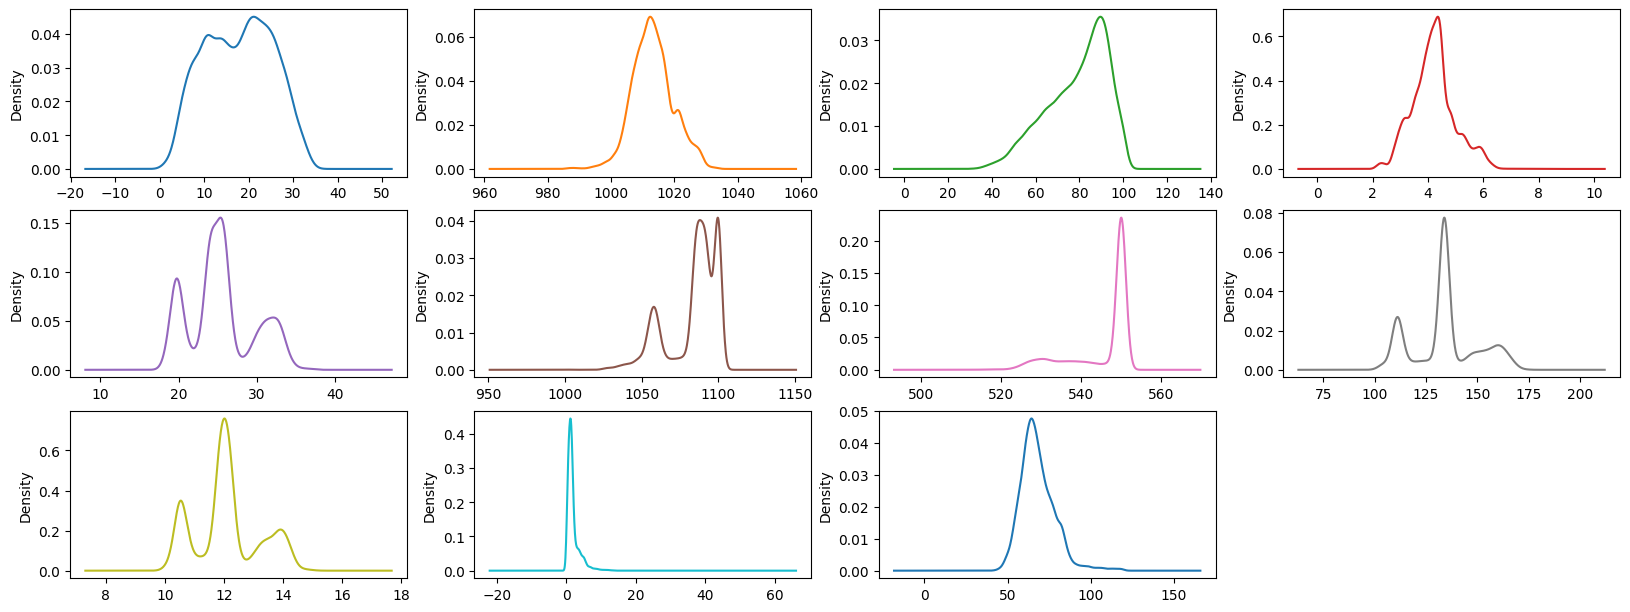

In [ ]:
df1.plot(kind='density',
             figsize=(20, 10),
             subplots=True,
             layout=(4, 4),
             sharex=False,
             legend=False)
plt.show()

AT :
{'whiskers': [<matplotlib.lines.Line2D object at 0x7fb8b82d9510>, <matplotlib.lines.Line2D object at 0x7fb8b82da6e0>], 'caps': [<matplotlib.lines.Line2D object at 0x7fb8b82dbe20>, <matplotlib.lines.Line2D object at 0x7fb8b82dae90>], 'boxes': [<matplotlib.lines.Line2D object at 0x7fb8b82dbb80>], 'medians': [<matplotlib.lines.Line2D object at 0x7fb8b82d9ed0>], 'fliers': [<matplotlib.lines.Line2D object at 0x7fb8b82dafe0>], 'means': []}


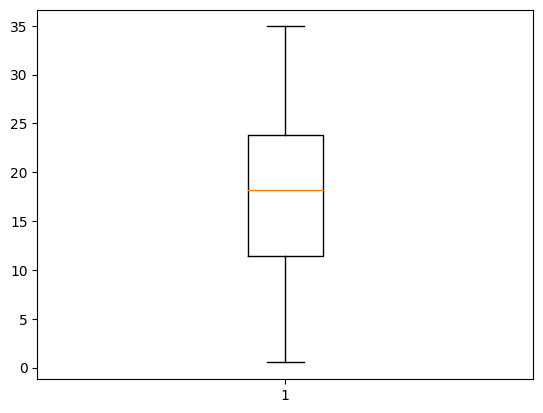

AP :
{'whiskers': [<matplotlib.lines.Line2D object at 0x7fb8b835e0b0>, <matplotlib.lines.Line2D object at 0x7fb8b835d300>], 'caps': [<matplotlib.lines.Line2D object at 0x7fb8b835fee0>, <matplotlib.lines.Line2D object at 0x7fb9108d1420>], 'boxes': [<matplotlib.lines.Line2D object at 0x7fb8b835d810>], 'medians': [<matplotlib.lines.Line2D object at 0x7fb9108d2cb0>], 'fliers': [<matplotlib.lines.Line2D object at 0x7fb9108d3490>], 'means': []}


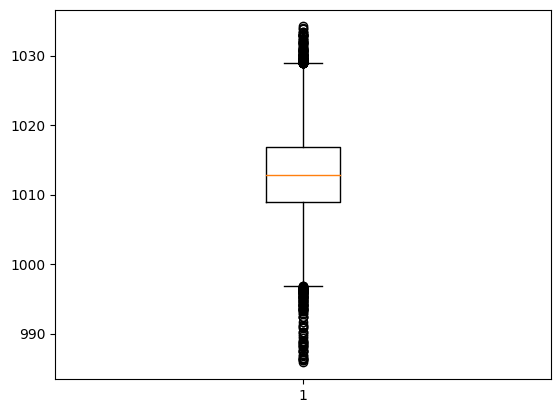

AH :
{'whiskers': [<matplotlib.lines.Line2D object at 0x7fb8b03e9810>, <matplotlib.lines.Line2D object at 0x7fb8b03e8dc0>], 'caps': [<matplotlib.lines.Line2D object at 0x7fb8b03e98a0>, <matplotlib.lines.Line2D object at 0x7fb8b03eba90>], 'boxes': [<matplotlib.lines.Line2D object at 0x7fb8b03eb370>], 'medians': [<matplotlib.lines.Line2D object at 0x7fb8b03e9c30>], 'fliers': [<matplotlib.lines.Line2D object at 0x7fb8b03e9f00>], 'means': []}


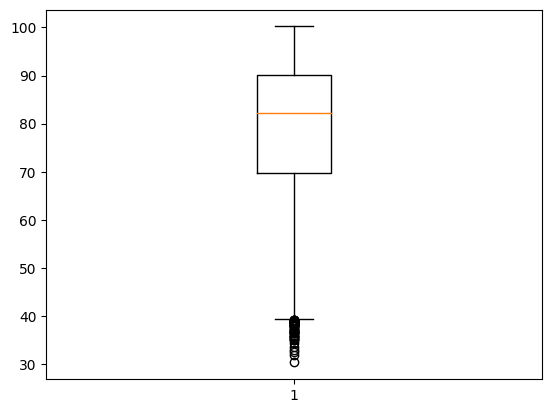

AFDP :
{'whiskers': [<matplotlib.lines.Line2D object at 0x7fb8b83092d0>, <matplotlib.lines.Line2D object at 0x7fb8b8308eb0>], 'caps': [<matplotlib.lines.Line2D object at 0x7fb8b830acb0>, <matplotlib.lines.Line2D object at 0x7fb8b830b370>], 'boxes': [<matplotlib.lines.Line2D object at 0x7fb8b04113f0>], 'medians': [<matplotlib.lines.Line2D object at 0x7fb8b830ae00>], 'fliers': [<matplotlib.lines.Line2D object at 0x7fb8b830a080>], 'means': []}


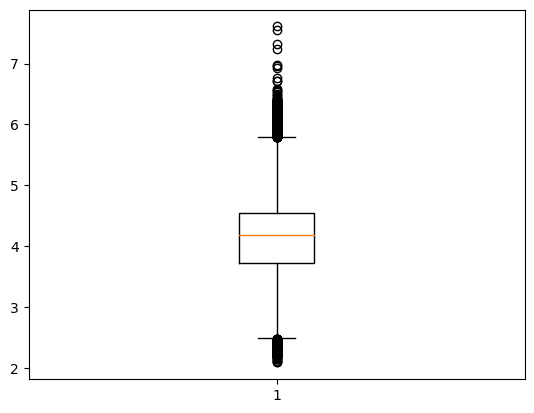

GTEP :
{'whiskers': [<matplotlib.lines.Line2D object at 0x7fb8a74388e0>, <matplotlib.lines.Line2D object at 0x7fb8a743b340>], 'caps': [<matplotlib.lines.Line2D object at 0x7fb8a7438d30>, <matplotlib.lines.Line2D object at 0x7fb8a7439810>], 'boxes': [<matplotlib.lines.Line2D object at 0x7fb8a743afe0>], 'medians': [<matplotlib.lines.Line2D object at 0x7fb8a7438e20>], 'fliers': [<matplotlib.lines.Line2D object at 0x7fb8a743a1a0>], 'means': []}


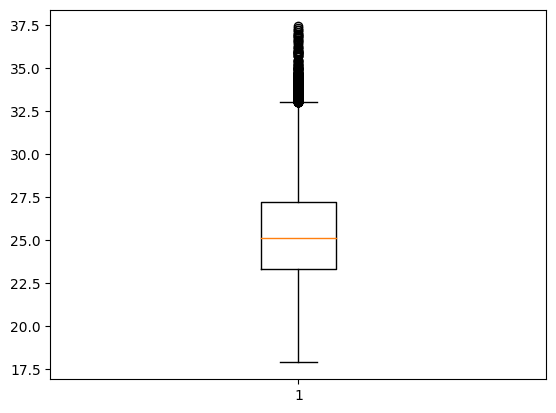

TIT :
{'whiskers': [<matplotlib.lines.Line2D object at 0x7fb911066080>, <matplotlib.lines.Line2D object at 0x7fb9110f6890>], 'caps': [<matplotlib.lines.Line2D object at 0x7fb9110f7a00>, <matplotlib.lines.Line2D object at 0x7fb9110f5e40>], 'boxes': [<matplotlib.lines.Line2D object at 0x7fb8a7020b80>], 'medians': [<matplotlib.lines.Line2D object at 0x7fb9110f5ae0>], 'fliers': [<matplotlib.lines.Line2D object at 0x7fb9108d3100>], 'means': []}


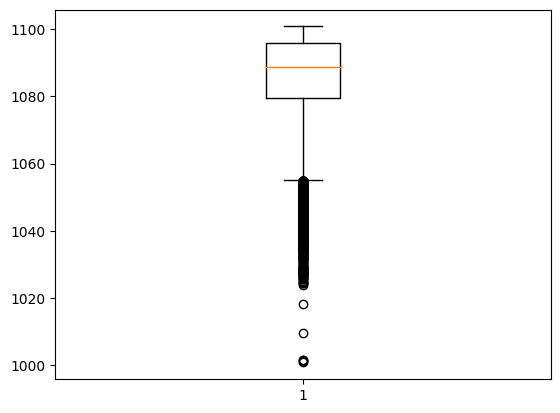

TAT :
{'whiskers': [<matplotlib.lines.Line2D object at 0x7fb8a7020190>, <matplotlib.lines.Line2D object at 0x7fb8a7023280>], 'caps': [<matplotlib.lines.Line2D object at 0x7fb8a7022e90>, <matplotlib.lines.Line2D object at 0x7fb8a7020c70>], 'boxes': [<matplotlib.lines.Line2D object at 0x7fb8a7021480>], 'medians': [<matplotlib.lines.Line2D object at 0x7fb8a7021b70>], 'fliers': [<matplotlib.lines.Line2D object at 0x7fb8a70235e0>], 'means': []}


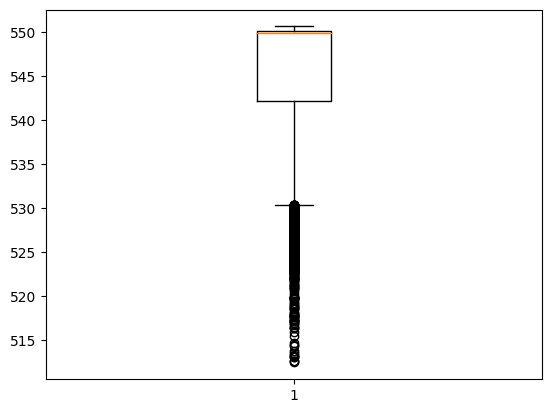

TEY :
{'whiskers': [<matplotlib.lines.Line2D object at 0x7fb8a73c5fc0>, <matplotlib.lines.Line2D object at 0x7fb8a73c6260>], 'caps': [<matplotlib.lines.Line2D object at 0x7fb8a73c6500>, <matplotlib.lines.Line2D object at 0x7fb8a73c67a0>], 'boxes': [<matplotlib.lines.Line2D object at 0x7fb8a73c5d20>], 'medians': [<matplotlib.lines.Line2D object at 0x7fb8a73c6a40>], 'fliers': [<matplotlib.lines.Line2D object at 0x7fb8a73c6ce0>], 'means': []}


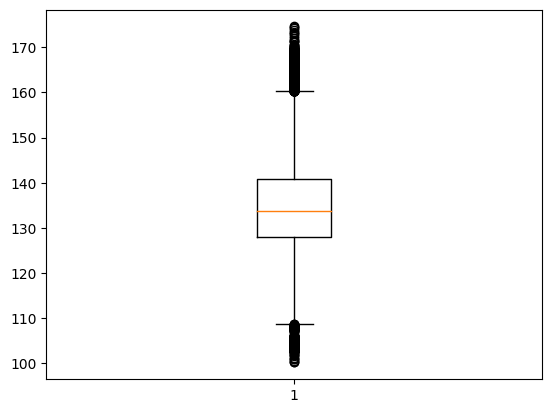

CDP :
{'whiskers': [<matplotlib.lines.Line2D object at 0x7fb8b03e8400>, <matplotlib.lines.Line2D object at 0x7fb8b03eb580>], 'caps': [<matplotlib.lines.Line2D object at 0x7fb8b03e8460>, <matplotlib.lines.Line2D object at 0x7fb8b840f610>], 'boxes': [<matplotlib.lines.Line2D object at 0x7fb8b03e9000>], 'medians': [<matplotlib.lines.Line2D object at 0x7fb8a7276e90>], 'fliers': [<matplotlib.lines.Line2D object at 0x7fb8a771e200>], 'means': []}


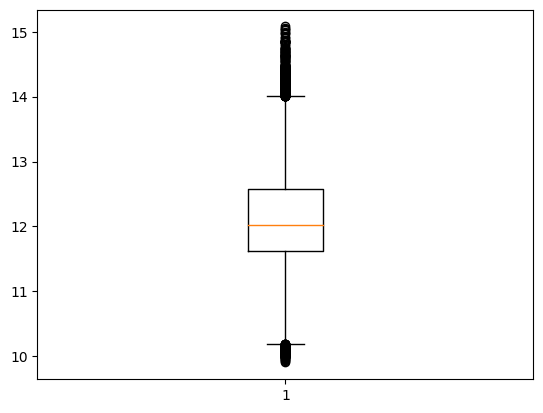

CO :
{'whiskers': [<matplotlib.lines.Line2D object at 0x7fb8a753bb50>, <matplotlib.lines.Line2D object at 0x7fb8a753bdf0>], 'caps': [<matplotlib.lines.Line2D object at 0x7fb8a75e00d0>, <matplotlib.lines.Line2D object at 0x7fb8a75e0370>], 'boxes': [<matplotlib.lines.Line2D object at 0x7fb8a753b8b0>], 'medians': [<matplotlib.lines.Line2D object at 0x7fb8a75e0610>], 'fliers': [<matplotlib.lines.Line2D object at 0x7fb8a75e08b0>], 'means': []}


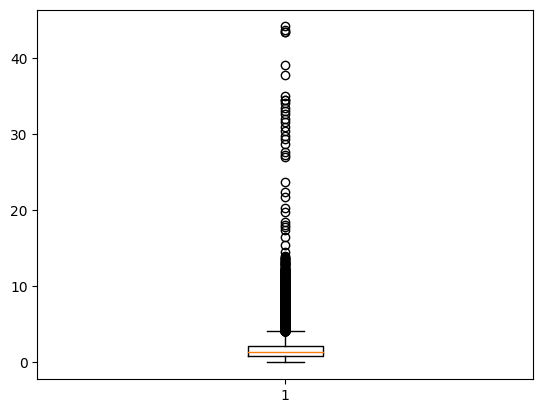

NOX :
{'whiskers': [<matplotlib.lines.Line2D object at 0x7fb8a7438b50>, <matplotlib.lines.Line2D object at 0x7fb8a7438c40>], 'caps': [<matplotlib.lines.Line2D object at 0x7fb8a7438670>, <matplotlib.lines.Line2D object at 0x7fb8a7439930>], 'boxes': [<matplotlib.lines.Line2D object at 0x7fb8a743ab90>], 'medians': [<matplotlib.lines.Line2D object at 0x7fb8a743bd60>], 'fliers': [<matplotlib.lines.Line2D object at 0x7fb8a743b9d0>], 'means': []}


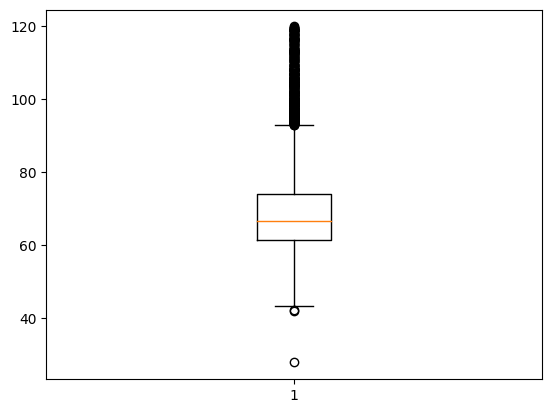

In [ ]:
for i in df1.columns:
  print(i,':')
  print(plt.boxplot(df1[i]))
  plt.show()

In [ ]:
Q3 = df1['AP'].quantile(q=0.75)
Q1 = df1['AP'].quantile(q=0.25)
IQR = Q3 - Q1
up = Q3 + 1.5 * IQR
down = Q1 - 1.5 * IQR


In [ ]:
import numpy as np

def cap_extreme_values(data, lower_bound, upper_bound):
    capped_data = np.clip(data, lower_bound, upper_bound)
    return capped_data

a = cap_extreme_values(df1['AP'], down, up)
df1['AP'] = a

In [ ]:
Q3 = df1['AH'].quantile(q=0.75)
Q1 = df1['AH'].quantile(q=0.25)
IQR = Q3 - Q1
up = Q3 + 1.5 * IQR
down = Q1 - 1.5 * IQR

In [ ]:
import numpy as np

def cap_extreme_values(data, lower_bound, upper_bound):
    capped_data = np.clip(data, lower_bound, upper_bound)
    return capped_data

b = cap_extreme_values(df1['AH'], down, up)
df1['AH'] = b

In [ ]:
Q3 = df1['AFDP'].quantile(q=0.75)
Q1 = df1['AFDP'].quantile(q=0.25)
IQR = Q3 - Q1
up = Q3 + 1.5 * IQR
down = Q1 - 1.5 * IQR

In [ ]:
import numpy as np

def cap_extreme_values(data, lower_bound, upper_bound):
    capped_data = np.clip(data, lower_bound, upper_bound)
    return capped_data

c = cap_extreme_values(df1['AFDP'], down, up)
df1['AFDP'] = c

In [ ]:
Q3 = df1['GTEP'].quantile(q=0.75)
Q1 = df1['GTEP'].quantile(q=0.25)
IQR = Q3 - Q1
up = Q3 + 1.5 * IQR
down = Q1 - 1.5 * IQR

In [ ]:
import numpy as np

def cap_extreme_values(data, lower_bound, upper_bound):
    capped_data = np.clip(data, lower_bound, upper_bound)
    return capped_data

d = cap_extreme_values(df1['GTEP'], down, up)
df1['GTEP'] = d

In [ ]:
Q3 = df1['TIT'].quantile(q=0.75)
Q1 = df1['TIT'].quantile(q=0.25)
IQR = Q3 - Q1
up = Q3 + 1.5 * IQR
down = Q1 - 1.5 * IQR

In [ ]:
import numpy as np

def cap_extreme_values(data, lower_bound, upper_bound):
    capped_data = np.clip(data, lower_bound, upper_bound)
    return capped_data

e = cap_extreme_values(df1['TIT'], down, up)
df1['TIT'] = e

In [ ]:
Q3 = df1['TAT'].quantile(q=0.75)
Q1 = df1['TAT'].quantile(q=0.25)
IQR = Q3 - Q1
up = Q3 + 1.5 * IQR
down = Q1 - 1.5 * IQR

In [ ]:
import numpy as np

def cap_extreme_values(data, lower_bound, upper_bound):
    capped_data = np.clip(data, lower_bound, upper_bound)
    return capped_data

f = cap_extreme_values(df1['TAT'], down, up)
df1['TAT'] = f

In [ ]:
Q3 = df1['TEY'].quantile(q=0.75)
Q1 = df1['TEY'].quantile(q=0.25)
IQR = Q3 - Q1
up = Q3 + 1.5 * IQR
down = Q1 - 1.5 * IQR

In [ ]:
import numpy as np

def cap_extreme_values(data, lower_bound, upper_bound):
    capped_data = np.clip(data, lower_bound, upper_bound)
    return capped_data

g = cap_extreme_values(df1['TEY'], down, up)
df1['TEY'] = g

In [ ]:
Q3 = df1['CDP'].quantile(q=0.75)
Q1 = df1['CDP'].quantile(q=0.25)
IQR = Q3 - Q1
up = Q3 + 1.5 * IQR
down = Q1 - 1.5 * IQR

In [ ]:
import numpy as np

def cap_extreme_values(data, lower_bound, upper_bound):
    capped_data = np.clip(data, lower_bound, upper_bound)
    return capped_data

h = cap_extreme_values(df1['CDP'], down, up)
df1['CDP'] = h

In [ ]:
Q3 = df1['CO'].quantile(q=0.75)
Q1 = df1['CO'].quantile(q=0.25)
IQR = Q3 - Q1
up = Q3 + 1.5 * IQR
down = Q1 - 1.5 * IQR

In [ ]:
import numpy as np

def cap_extreme_values(data, lower_bound, upper_bound):
    capped_data = np.clip(data, lower_bound, upper_bound)
    return capped_data

i = cap_extreme_values(df1['CO'], down, up)
df1['CO'] = i

In [ ]:
Q3 = df1['NOX'].quantile(q=0.75)
Q1 = df1['NOX'].quantile(q=0.25)
IQR = Q3 - Q1
up = Q3 + 1.5 * IQR
down = Q1 - 1.5 * IQR

In [ ]:
import numpy as np

def cap_extreme_values(data, lower_bound, upper_bound):
    capped_data = np.clip(data, lower_bound, upper_bound)
    return capped_data

j = cap_extreme_values(df1['NOX'], down, up)
df1['NOX'] = j

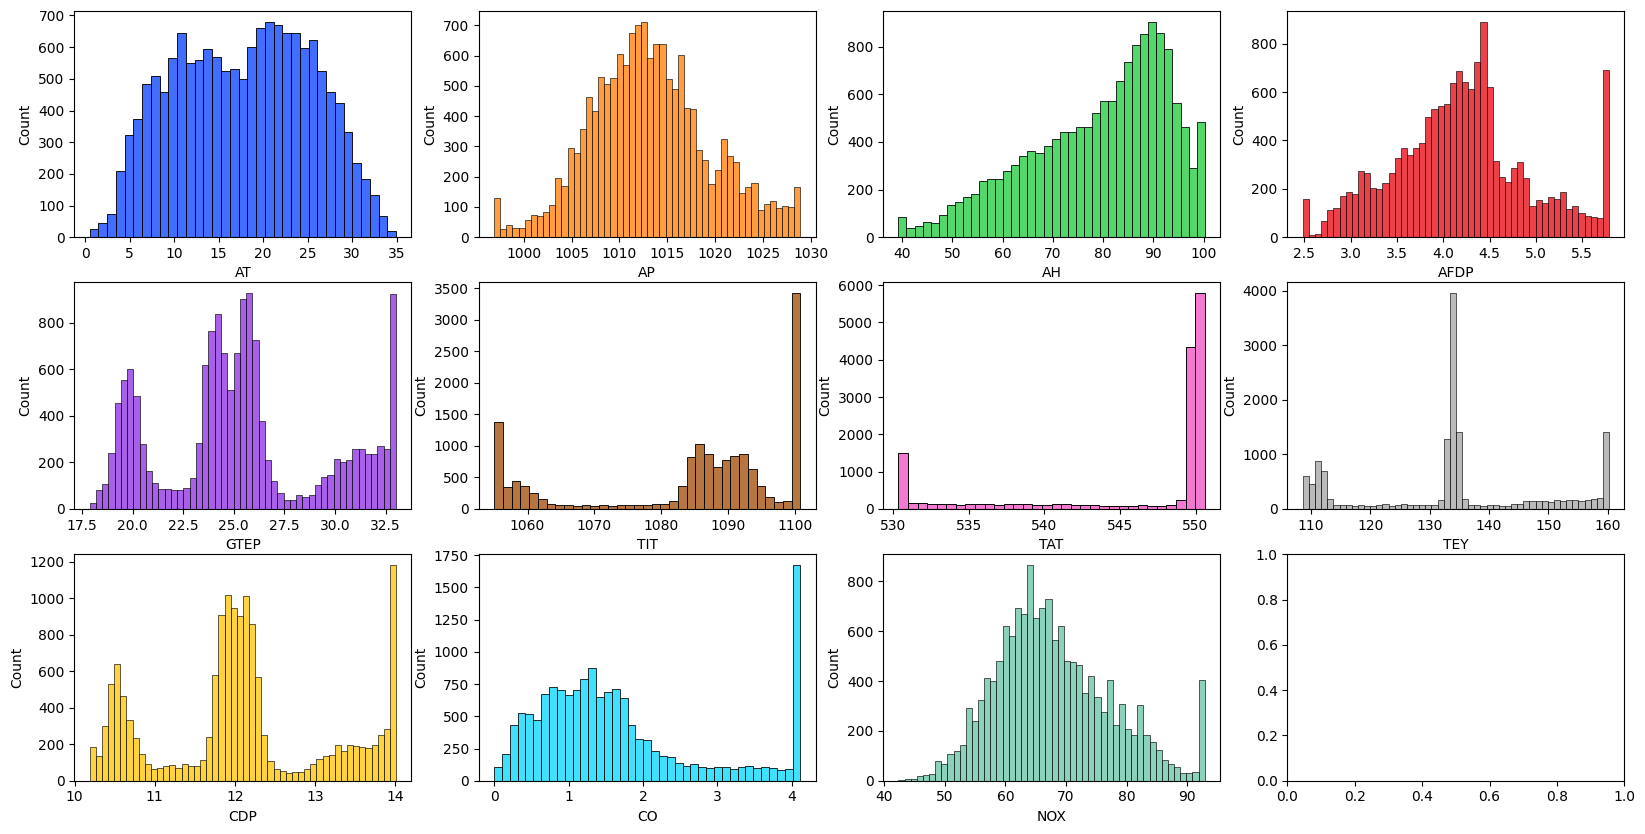

In [ ]:
color_palette = sns.color_palette("bright") + sns.color_palette("Set2") + sns.color_palette("husl", 25)

fig, axes = plt.subplots(3, 4,figsize=(20,10))
axe = axes.flatten()

for i,feature in enumerate(df1.columns):
    sns.histplot(data=df1, x=feature, ax=axe[i], color=color_palette[i])
plt.show()

In [ ]:
X = df1.drop('TEY', axis=1)
Y = df1[['TEY']]

In [ ]:
seed = 7
validation_size = 0.20

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=validation_size, random_state=seed)

In [ ]:
from sklearn.preprocessing import MinMaxScaler

In [ ]:
norm = MinMaxScaler().fit(X_train)
X_train_norm = norm.transform(X_train)
X_test_norm = norm.transform(X_test)

In [ ]:
from keras.models import Sequential
from keras.layers import Dense


In [ ]:
model = Sequential()
model.add(Dense(20, input_dim=10,  activation='relu'))
model.add(Dense(10,  activation='relu'))
model.add(Dense(10,  activation='relu'))
model.add(Dense(1, activation='linear'))

In [ ]:
model.compile(loss='mse', optimizer='rmsprop', metrics=['mean_absolute_error'])

In [ ]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 20)                220       
                                                                 
 dense_4 (Dense)             (None, 10)                210       
                                                                 
 dense_5 (Dense)             (None, 10)                110       
                                                                 
 dense_6 (Dense)             (None, 1)                 11        
                                                                 
Total params: 551 (2.15 KB)
Trainable params: 551 (2.15 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
history = model.fit(X_train_norm, Y_train, validation_split=0.33, epochs=250, batch_size=10)

Epoch 1/250
806/806 [==============================] - 4s 4ms/step - loss: 7140.9307 - mean_absolute_error: 63.4762 - val_loss: 63.1710 - val_mean_absolute_error: 6.3302
Epoch 2/250
806/806 [==============================] - 2s 2ms/step - loss: 53.1473 - mean_absolute_error: 5.7268 - val_loss: 45.6401 - val_mean_absolute_error: 5.3048
Epoch 3/250
806/806 [==============================] - 2s 2ms/step - loss: 39.2959 - mean_absolute_error: 4.9057 - val_loss: 33.2940 - val_mean_absolute_error: 4.5265
Epoch 4/250
806/806 [==============================] - 3s 4ms/step - loss: 28.6014 - mean_absolute_error: 4.1867 - val_loss: 24.8762 - val_mean_absolute_error: 3.9306
Epoch 5/250
806/806 [==============================] - 2s 3ms/step - loss: 19.7888 - mean_absolute_error: 3.4824 - val_loss: 15.0794 - val_mean_absolute_error: 3.0327
Epoch 6/250
806/806 [==============================] - 2s 2ms/step - loss: 12.6079 - mean_absolute_error: 2.7657 - val_loss: 8.9957 - val_mean_absolute_error: 2.3